# Building systems

This section several ways to construct an initial molecular structure. Common choices include:

- Specifying the structure using the simplified molecular-input line-entry system ([SMILES](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system)) line notation. A presentation of this technique using VeloxChem is given below

- Downloading a structure from the protein data bank ([PDB](https://www.rcsb.org/))

- Using a graphical molecular editor, such as [Avogadro](https://avogadro.cc/)


In [1]:
import veloxchem as vlx


(sec:from_smiles)=
## Using SMILES

The interaction with SMILES strings in VeloxChem uses functionalities from the [RDkit](https://www.rdkit.org/) package. We will illustrate some of basic SMILES string features.

```{note}
Remember to make sure to visualize the resulting geometries and ensure they correspond to what you are interested in.
```

We can obtain the SMILES string of caffeine from [Wikipedia](https://en.wikipedia.org/wiki/Caffeine) and construct a force-field optimized structure.

In [2]:
smiles_str = "CN1C=NC2=C1C(=O)N(C(=O)N2C)C"

caffeine_molecule = vlx.Molecule.read_smiles(smiles_str)

In `vlx.Molecule.read_smiles` we:

1. Build the molecule, excluding implicit atoms (hydrogens)
2. Add hydrogens
3. Generate conformer
4. Optimize using the Universal Force Field (UFF)
5. Return the `molecule` object

A graphical illustration of the molecule is obtained with the `show` method.

In [16]:
caffeine_molecule.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

The molecular coordinates can be retrieved as an xyz-string using the `get_xyz_string` method.

In [17]:
caffeine_xyz = caffeine_molecule.get_xyz_string()

print(caffeine_xyz)

24

C             -3.246030000000        -1.130310000000         0.025980000000
N             -2.262080000000        -0.077920000000         0.007760000000
C             -2.516750000000         1.268080000000        -0.001470000000
N             -1.402970000000         1.973590000000        -0.005660000000
C             -0.410650000000         1.040380000000        -0.000280000000
C             -0.905090000000        -0.228440000000         0.004840000000
C             -0.080570000000        -1.385890000000         0.010530000000
O             -0.536520000000        -2.525370000000         0.015670000000
N              1.283180000000        -1.078550000000         0.010220000000
C              1.833810000000         0.220410000000         0.006860000000
O              3.056760000000         0.390670000000         0.007920000000
N              0.939960000000         1.291810000000         0.003250000000
C              1.425170000000         2.659750000000         0.004880000000
C       

In order to immediately get the xyz-object, we can also use:

In [4]:
caffeine_xyz = vlx.Molecule.smiles_to_xyz(smiles_str)

For a 2D-representation:

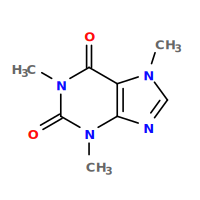

In [6]:
from IPython.display import SVG

caffeine_molecule.draw_2d(smiles_str, width=300, height=300)

Since the initial conformer and force field optimized structure will have different orientations, the image will look somewhat different each time and this will affect the projection to 2D, particularly so for larger molecules extending in all three dimensions. Still, for many molecules this will work quite well, and you can save the .svg-figure with right-click save.

### Bond type

The basic principle of SMILES is to start at a suitable part of the molecule, and build the full molecule by sequentially describing the connections of each atom/functional group in turn. Hydrogens are typically added implicitly, and thus do not need to be specified. As such, the first four alkanes can simply be written with an increasing number of "C".

In [7]:
import py3Dmol as p3d

methane_xyz = vlx.Molecule.smiles_to_xyz("C")
ethane_xyz = vlx.Molecule.smiles_to_xyz("CC")
propane_xyz = vlx.Molecule.smiles_to_xyz("CCC")
butane_xyz = vlx.Molecule.smiles_to_xyz("CCCC")

viewer = p3d.view(viewergrid=(2, 2), width=500, height=300, linked=False)
viewer.addModel(methane_xyz, "xyz", viewer=(0, 0))
viewer.addModel(ethane_xyz, "xyz", viewer=(0, 1))
viewer.addModel(propane_xyz, "xyz", viewer=(1, 0))
viewer.addModel(butane_xyz, "xyz", viewer=(1, 1))
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.zoomTo()
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Bond types are specified with different symbols between two atoms, with `-`, `=`, and `#`, for single-, double-, and triple-bonds, respectively, and other bond types are possible (see, *e.g.*, [Wikipedia](https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system)). Single bonds is assumed if no bond type is specified.

For example, ethane, ethene, and ethyne are constructed as:

In [8]:
ethane_xyz = vlx.Molecule.smiles_to_xyz("C-C")  # or 'CC'
ethene_xyz = vlx.Molecule.smiles_to_xyz("C=C")
ethyne_xyz = vlx.Molecule.smiles_to_xyz("C#C")

viewer = p3d.view(viewergrid=(1, 3), width=400, height=200, linked=False)
viewer.addModel(ethane_xyz, "xyz", viewer=(0, 0))
viewer.addModel(ethene_xyz, "xyz", viewer=(0, 1))
viewer.addModel(ethyne_xyz, "xyz", viewer=(0, 2))
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.zoomTo()
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Branching and substitutions

Branches are given within paranthesis, as connected to the atom just before the paranthesis. These branches can be nested, for more complex molecules.

```{note}
Several valid SMILES strings can typically be written for the same molecule.
```


Hexane and 3-ethylheptane are then written as:

In [9]:
hexane_xyz = vlx.Molecule.smiles_to_xyz("CCCCCC")
ethylheptane_xyz = vlx.Molecule.smiles_to_xyz("CCCCC(CC)CC")

viewer = p3d.view(viewergrid=(1, 2), width=500, height=200, linked=False)
viewer.addModel(hexane_xyz, "xyz", viewer=(0, 0))
viewer.addModel(ethylheptane_xyz, "xyz", viewer=(0, 1))
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.zoomTo()
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Substitutions are done by replacing the relevant atom, or adding it to replace an implicit hydrogen. For example, methanol, 1,1-difluoroethene, and 1,2-difluoroethene can be given as:

In [10]:
methanol_xyz = vlx.Molecule.smiles_to_xyz("CO")
difluoro11_xyz = vlx.Molecule.smiles_to_xyz("C=C(F)F")
difluoro12_xyz = vlx.Molecule.smiles_to_xyz("FC=CF")

viewer = p3d.view(viewergrid=(1, 3), width=400, height=200, linked=False)
viewer.addModel(methanol_xyz, "xyz", viewer=(0, 0))
viewer.addModel(difluoro11_xyz, "xyz", viewer=(0, 1))
viewer.addModel(difluoro12_xyz, "xyz", viewer=(0, 2))
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.zoomTo()
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Optimization using force field

Following the construction of a conformer from a SMILES string, it is generally advised to perform a short optimization to obtain a structure close to a local minimum.

As an example, for ethanol the initial conformer will have the OH-group with any rotation to CH$_3$, and following a force field optimization it takes on the staggered conformation:

In [11]:
ethanol_initial_xyz = vlx.Molecule.smiles_to_xyz("CO", optimize=False)
ethanol_xyz = vlx.Molecule.smiles_to_xyz("CO")

viewer = p3d.view(viewergrid=(1, 2), width=400, height=200, linked=False)
viewer.addModel(ethanol_initial_xyz, "xyz", viewer=(0, 0))
viewer.addModel(ethanol_xyz, "xyz", viewer=(0, 1))
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.zoomTo()
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### Ring systems

Ring systems are constructed by labeling part(s) of the ring and then closing the ring by having the SMILES string go back to the labeled atom(s). This can be performed several time, so that, *e.g.* cyclohexane and norbornane are written as:

In [12]:
cyclohexane_xyz = vlx.Molecule.smiles_to_xyz("C1CCCCC1")
norborane_xyz = vlx.Molecule.smiles_to_xyz("C1C2CCC(C2)C1")

viewer = p3d.view(viewergrid=(1, 2), width=400, height=200, linked=False)
viewer.addModel(cyclohexane_xyz, "xyz", viewer=(0, 0))
viewer.addModel(norborane_xyz, "xyz", viewer=(0, 1))
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.zoomTo()
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Aromatic rings can be written by using alternating single and double bonds or using lower-case for the contributing atoms. For example, p-cymene can be written as both:

In [13]:
pcymene1_xyz = vlx.Molecule.smiles_to_xyz("C=C(C)C1=CC=C(C)C=C1")
pcymene2_xyz = vlx.Molecule.smiles_to_xyz("C=C(C)c1ccc(C)cc1")

viewer = p3d.view(viewergrid=(1, 2), width=500, height=200, linked=False)
viewer.addModel(pcymene1_xyz, "xyz", viewer=(0, 0))
viewer.addModel(pcymene2_xyz, "xyz", viewer=(0, 1))
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.zoomTo()
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### More complex systems

For more complex molecules, the easiest option is to check if Wikipedia, [ChemSpider](http://www.chemspider.com/), or any other digital resources provide the SMILES string. This will work for many common molecules, and for the rest you can either consult more detailed guides on using SMILES and go from there, or use a graphical interface.

```{note}
No matter which option is chosen, we stress that you should always check that the structure you obtain is reasonably close to what is sought. For some systems you may need to sample many different conformers, and for PDB-files you might have to add hydrogens.
```

As an example, the structures NADH (left) and NAD$^+$ (right) are illustrated below, using the SMILES string from [Wikipedia](https://en.wikipedia.org/wiki/Nicotinamide_adenine_dinucleotide). Nicotinamide adenine dinucleotide partake in metabolism through the redox reaction:

$$
\mathrm{NADH} \Longleftrightarrow \mathrm{NAD}^+ +  \mathrm{H}^+ + 2\mathrm{e}^- 
$$

The resulting conformers need to be corrected, but we see that the general structure and the location of the hydrogen at the nicotinamide ring is correct.

In [14]:
nadh_xyz = vlx.Molecule.smiles_to_xyz(
    "O=C(N)C1CC=C[N](C=1)[C@@H]2O[C@@H]([C@@H](O)[C@H]2O)COP([O-])(=O)OP(=O)([O-])OC[C@H]5O[C@@H](n4cnc3c(ncnc34)N)[C@H](O)[C@@H]5O"
)
nadp_xyz = vlx.Molecule.smiles_to_xyz(
    "O=C(N)c1ccc[n+](c1)[C@@H]2O[C@@H]([C@@H](O)[C@H]2O)COP([O-])(=O)OP(=O)([O-])OC[C@H]5O[C@@H](n4cnc3c(ncnc34)N)[C@H](O)[C@@H]5O"
)

viewer = p3d.view(viewergrid=(1, 2), width=600, height=200, linked=False)
viewer.addModel(nadh_xyz, "xyz", viewer=(0, 0))
viewer.addModel(nadp_xyz, "xyz", viewer=(0, 1))
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.zoomTo()
viewer.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Using a structure downloaded from the PDB databank 

In [15]:
from urllib.request import urlopen

# Specify the PDB ID you want to download
ID = '1AOI'
url = 'https://files.rcsb.org/download/' + ID + '.pdb'

with urlopen(url) as fh:
    pdb = fh.read().decode('utf-8')

view = p3d.view()
view.addModel(pdb,'pdb')
view.setBackgroundColor('white')
view.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
view.zoomTo()
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol